#**RE6013 Lawsuit Homework**

## **Background** ##
A few years ago, the United States District Court of Houston had a case that arises under Title VII of the Civil Rights Act of 1964, 42 U.S.C. 200e et seq. The plaintiffs in this case were all female doctors at Houston College of Medicine who claimed that the College has engaged in a pattern and practice of discrimination against women in giving promotions and setting salaries. The Lead plaintiff in this action, a pediatrician and an assistant professor, was denied for promotion at the College. The plaintiffs had presented a set of data to show that **female faculty at the school were less likely to be full professors**, **more likely to be assistant professors**, and **earn less money than men**, on average.


## **Details** ##
Who are we: analytics consultant for the female doctors

Target audience: senior management, court judge and jury (basically non analytics expert/programmer)



In [ ]:
# to check the version of R
R.version.string

[1] "R version 4.2.2 Patched (2022-11-10 r83330)"

In [ ]:
#Install packages IF NEEDED
install.packages("ggplots2", repos="https://cran.asia/", dependencies = TRUE)
install.packages("data.table", repos="https://cran.asia/", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplots2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘RcppCCTZ’, ‘Rcpp’, ‘RcppDate’, ‘R.utils’, ‘xts’, ‘nanotime’, ‘zoo’




In [ ]:
#Import necessary libraries
library(data.table)
library(ggplot2)

library(grid)

In [ ]:
#set working directory to current
setwd("./")

In [ ]:
#Import csv
url <- "https://raw.githubusercontent.com/howry423/t7hw1re6013/main/Lawsuit.csv"
lawsuit.dt <- fread(url)
sprintf("Data downloaded from %s!", url)
head(lawsuit.dt,2)

[1] "Data downloaded from https://raw.githubusercontent.com/howry423/t7hw1re6013/main/Lawsuit.csv!"

ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,1,1,0,0,7.4,9,3,77836,84612
2,1,1,0,0,6.7,10,2,69994,78497


In [ ]:
# process the data
lawsuit.dt$Gender <- factor(lawsuit.dt$Gender)
lawsuit.dt$Rank <- factor(lawsuit.dt$Rank)
lawsuit.dt$Dept <- factor(lawsuit.dt$Dept)
lawsuit.dt$Clin <- factor(lawsuit.dt$Clin)
lawsuit.dt$Cert <- factor(lawsuit.dt$Cert)
head(lawsuit.dt,5)

ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<int>,<int>
1,1,1,0,0,7.4,9,3,77836,84612
2,1,1,0,0,6.7,10,2,69994,78497
3,1,1,0,0,8.1,6,1,62872,67756
4,1,1,1,1,5.1,27,3,155196,173220
5,1,1,0,0,7.0,10,3,89268,96099


In [ ]:
# add new datas
# add data for pay_raise
lawsuit.dt[, pay_raise := Sal95 - Sal94]
head(lawsuit.dt,5)

ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,pay_raise
<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<int>,<int>,<int>
1,1,1,0,0,7.4,9,3,77836,84612,6776
2,1,1,0,0,6.7,10,2,69994,78497,8503
3,1,1,0,0,8.1,6,1,62872,67756,4884
4,1,1,1,1,5.1,27,3,155196,173220,18024
5,1,1,0,0,7.0,10,3,89268,96099,6831


In [ ]:
#Split if necessary
# female data.table -> gender == 0
female.dt <- lawsuit.dt[Gender == 0]
# male data.table -> gender == 1
male.dt <- lawsuit.dt[Gender == 1]

In [ ]:
#Get summary of lawsuit.dt
summary(lawsuit.dt)

       ID      Dept   Gender  Clin    Cert        Prate           Exper      
 Min.   :  1   1:50   0:106   0:101   0: 73   Min.   :1.300   Min.   : 1.00  
 1st Qu.: 66   2:40   1:155   1:160   1:188   1st Qu.:3.200   1st Qu.: 6.00  
 Median :131   3:21                           Median :4.400   Median : 9.00  
 Mean   :131   4:30                           Mean   :4.932   Mean   :10.23  
 3rd Qu.:196   5:80                           3rd Qu.:6.900   3rd Qu.:14.00  
 Max.   :261   6:40                           Max.   :8.700   Max.   :37.00  
 Rank        Sal94            Sal95          pay_raise    
 1:112   Min.   : 34514   Min.   : 38675   Min.   : 2312  
 2: 64   1st Qu.: 90771   1st Qu.: 99972   1st Qu.: 8494  
 3: 85   Median :133284   Median :148117   Median :12955  
         Mean   :153593   Mean   :168907   Mean   :15313  
         3rd Qu.:200543   3rd Qu.:218955   3rd Qu.:19364  
         Max.   :428876   Max.   :472589   Max.   :53460  

# **Overview**

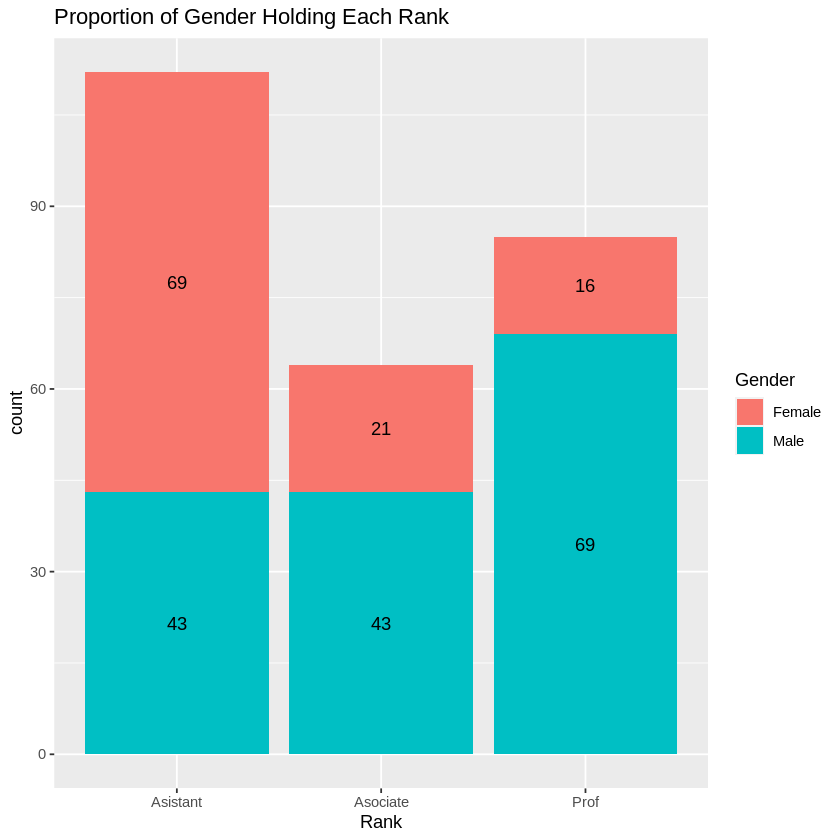

In [ ]:
# count number of males vs females at rank level
ggplot(data = lawsuit.dt, aes(Rank, fill = Gender)) +
  geom_bar() +
  scale_fill_discrete(labels = c("0" = "Female", "1" = "Male")) +
  scale_x_discrete(labels = c("1" = "Asistant", "2" = "Asociate", "3" = "Prof")) +
  labs(title = "Proportion of Gender Holding Each Rank") +
  geom_text(stat='count', aes(label=after_stat(count)), position = position_stack(vjust = 0.5)) 

# **Argument 1: Female faculty earns less money than the male faculty: across all ranks, and across all salary ranges**

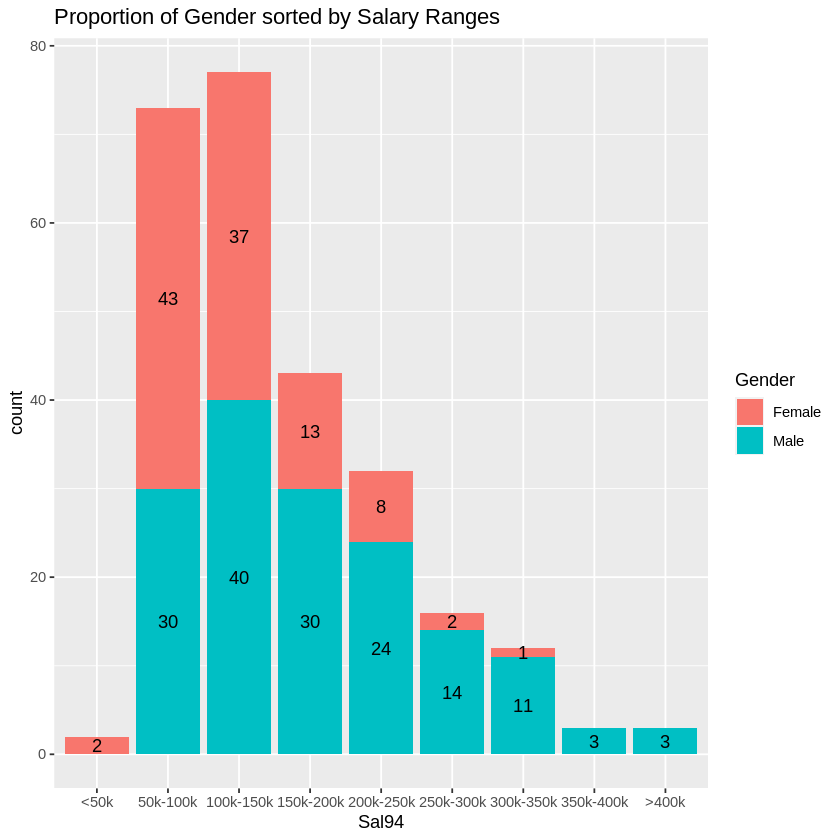

In [ ]:
# create a copy of the lawsuit datatable and segment the salary column into ranges starting from 0 to 500k, in blocks of 50k
lawsuit_edit.dt = copy(lawsuit.dt)
lawsuit_edit.dt$Sal94 <- cut(lawsuit_edit.dt$Sal94, breaks = seq(0, 500000, 50000))

# plot proportion of gender sorted by salary ranges
ggplot(lawsuit_edit.dt, aes(fill=Gender, x=Sal94)) + 
  scale_fill_discrete(labels = c("Female", "Male")) +
  labs(title ="Proportion of Gender sorted by Salary Ranges") +
  geom_bar(width=0.9) +
  scale_x_discrete(labels=c('<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '>400k')) +
  geom_text(stat='count', aes(label=after_stat(count)), position = position_stack(vjust = 0.5))

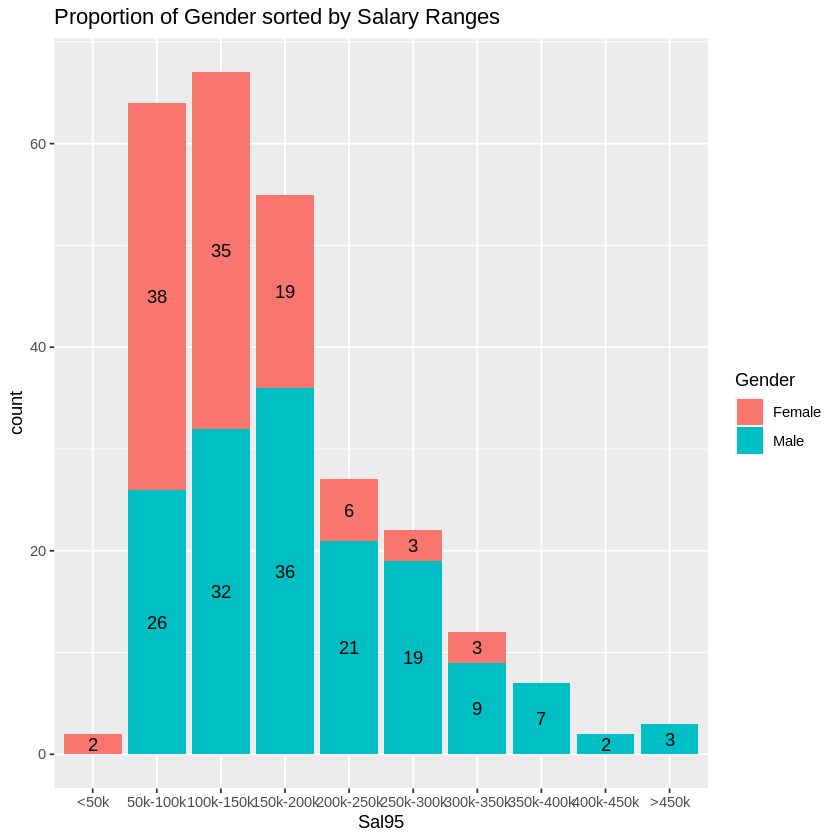

In [ ]:
# create a copy of the lawsuit datatable and segment the salary column into ranges starting from 0 to 500k, in blocks of 50k
lawsuit_edit.dt = copy(lawsuit.dt)
lawsuit_edit.dt$Sal95 <- cut(lawsuit_edit.dt$Sal95, breaks = seq(0, 500000, 50000))

# plot proportion of gender sorted by salary ranges
ggplot(lawsuit_edit.dt, aes(fill=Gender, x=Sal95)) + 
  scale_fill_discrete(labels = c("Female", "Male")) +
  labs(title ="Proportion of Gender sorted by Salary Ranges") +
  geom_bar(width=0.9) +
  scale_x_discrete(labels=c('<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '>450k')) +
  geom_text(stat='count', aes(label=after_stat(count)), position = position_stack(vjust = 0.5))

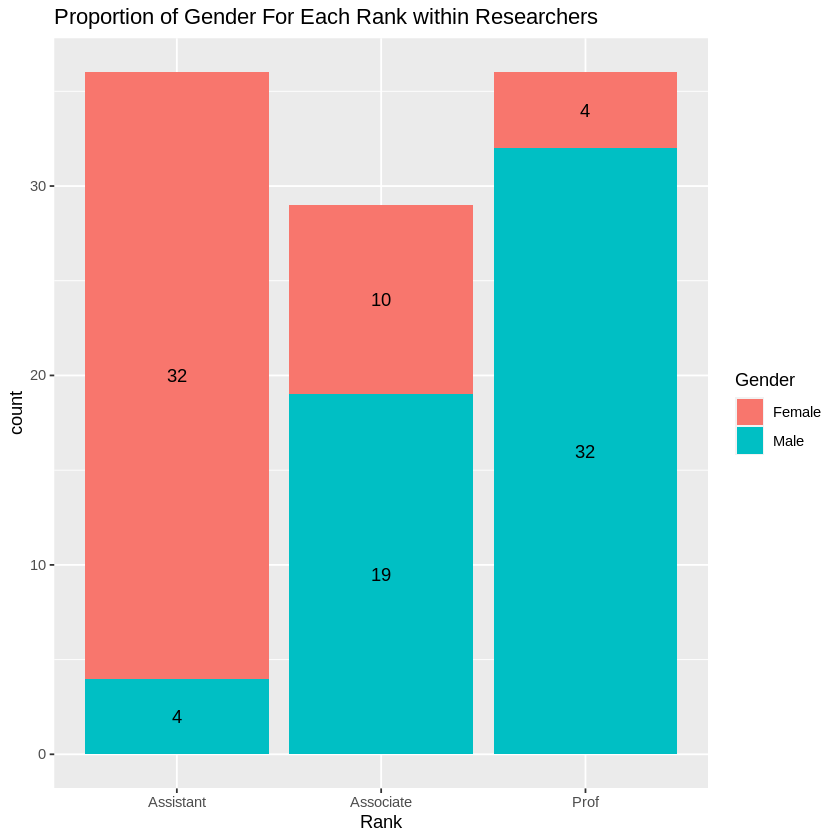

In [ ]:
# plot proportion of gender for each rank within researchers
researchers.dt <- lawsuit.dt[Clin == '0',]
ggplot(data = researchers.dt, aes(Rank, fill = Gender)) +
  geom_bar() +
  scale_fill_discrete(labels = c("0" = "Female", "1" = "Male")) +
  scale_x_discrete(labels = c("1" = "Assistant", "2" = "Associate", "3" = "Prof")) +
  labs(title = "Proportion of Gender For Each Rank within Researchers") +
  geom_text(stat='count', aes(label=after_stat(count)), position = position_stack(vjust = 0.5))

## Prate + Research emphasis vs Rank

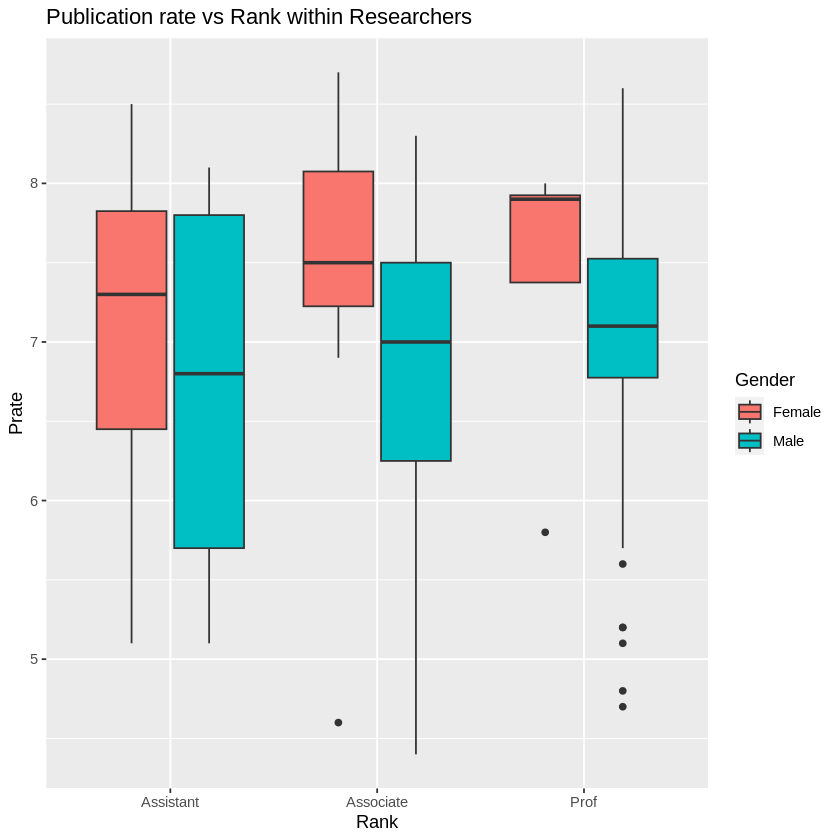

In [ ]:
ggplot(data = researchers.dt, aes(x = Rank , y = Prate, fill=Gender)) +
  geom_boxplot() +
  scale_fill_discrete(labels = c("0" = "Female", "1" = "Male")) +
  scale_x_discrete(labels = c("1" = "Assistant", "2" = "Associate", "3" = "Prof")) +
  labs(title = "Publication rate vs Rank within Researchers")

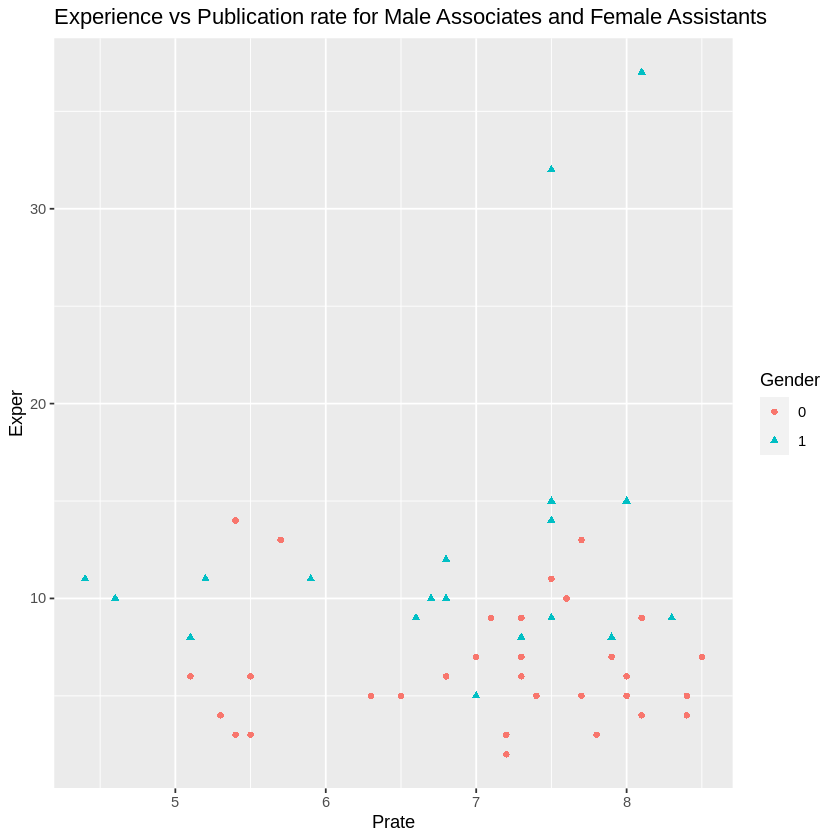

In [ ]:
custom.dt <- researchers.dt[ (Rank == '1' & Gender =='0') | (Rank == '2' & Gender =='1'), ]
ggplot(data = custom.dt, aes(x = Prate , y = Exper, shape = Gender, color = Gender)) +
  geom_point() +
  scale_fill_discrete(labels = c("0" = "Female", "1" = "Male")) +
  labs(title = "Experience vs Publication rate for Male Associates and Female Assistants")

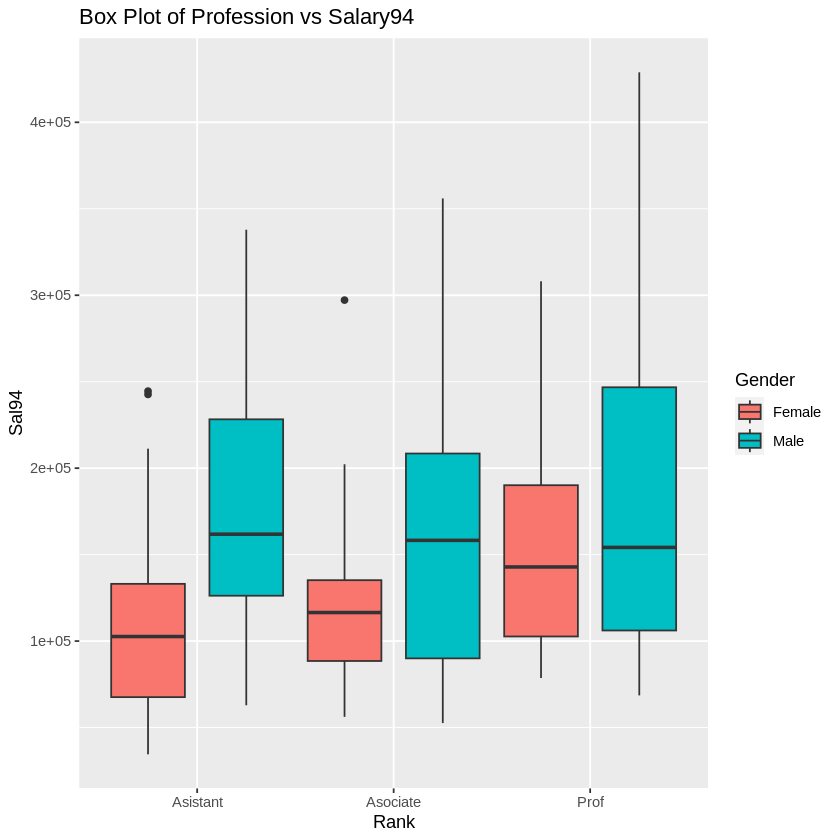

In [ ]:
#Boxplot rank vs salary94 according to gender
ggplot(data = lawsuit.dt, aes(x = Rank, y = Sal94, fill = Gender)) +
    geom_boxplot(position = position_dodge(1)) +
    labs(title = "Box Plot of Profession vs Salary94") +
    scale_fill_discrete(labels = c("0" = "Female", "1" = "Male")) +
    scale_x_discrete(labels = c("1" = "Asistant", "2" = "Asociate", "3" = "Prof"))


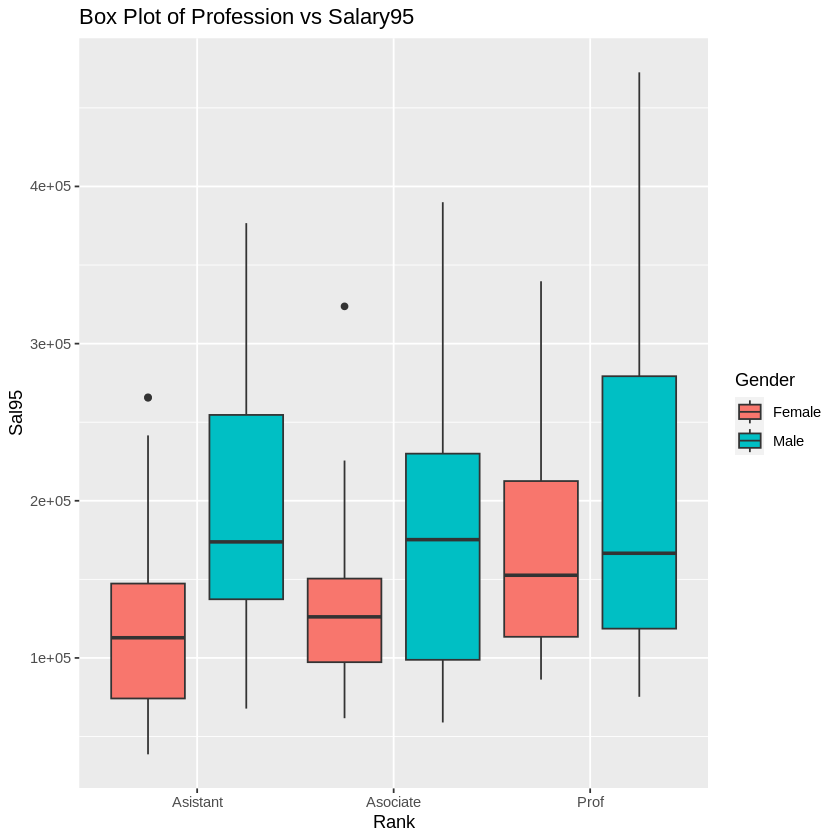

In [ ]:
#Boxplot rank vs salary95 according to gender
ggplot(data = lawsuit.dt, aes(x = Rank, y = Sal95, fill = Gender)) +
    geom_boxplot(position = position_dodge(1)) +
    labs(title = "Box Plot of Profession vs Salary95") +
    scale_fill_discrete(labels = c("0" = "Female", "1" = "Male")) +
    scale_x_discrete(labels = c("1" = "Asistant", "2" = "Asociate", "3" = "Prof"))

# **Argument 2: Not only does female faculty earn less, a larger percentage of women also enjoy less pay raise than men! 😠**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


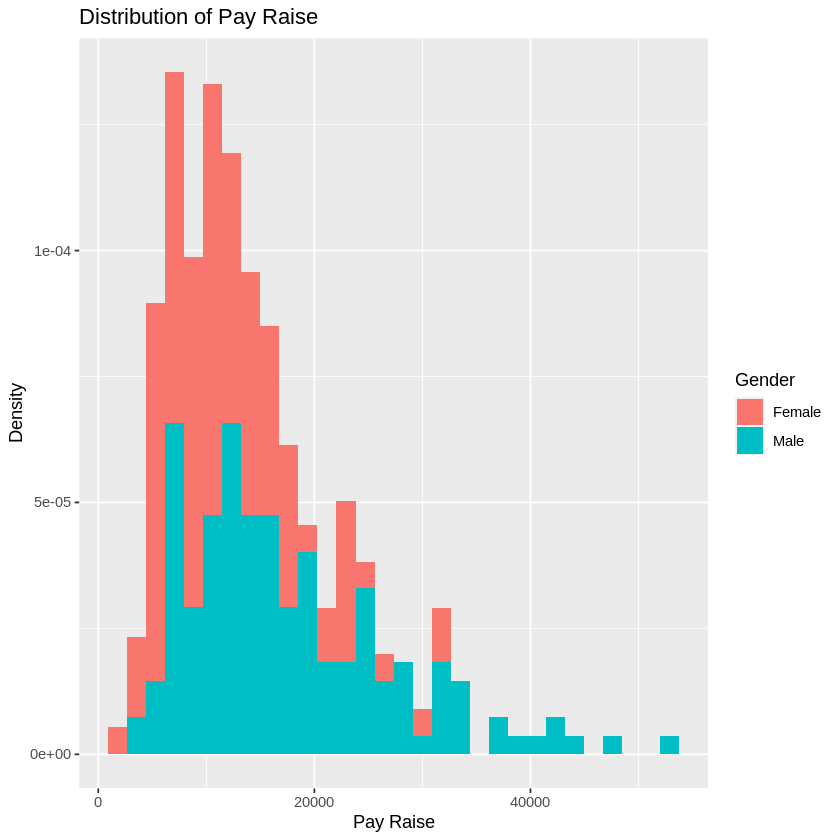

In [ ]:
#Distribution plot of pay raise
ggplot(data = lawsuit.dt[order(pay_raise)], aes(x = pay_raise, fill = Gender)) +
    geom_histogram(aes(y = after_stat(density))) +
    labs(title = "Distribution of Pay Raise", x = "Pay Raise", y = "Density") +
    # geom_density(alpha = .2) +
    scale_fill_discrete(labels = c("0" = "Female", "1" = "Male"))
    

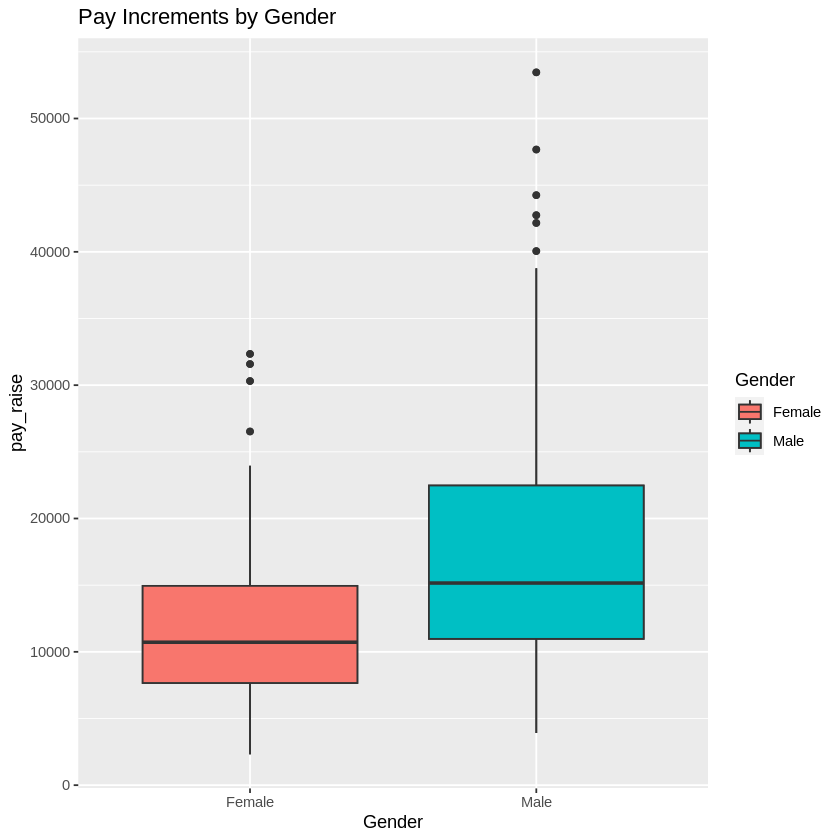

In [ ]:
# mean pay increase for males is higher than females

ggplot(data = lawsuit.dt, aes(x = Gender, y = pay_raise, fill=Gender)) +
  geom_boxplot() +
  geom_boxplot(position = position_dodge(1)) +
  labs(title = "Pay Increments by Gender")+
  scale_fill_discrete(labels = c("0" = "Female", "1" = "Male")) +
  scale_x_discrete(labels = c("1" = "Male", "0" = "Female"))
  

In [ ]:
mean_female_pay94 <- mean(lawsuit.dt[Gender == 0, Sal94])
mean_female_pay95 <- mean(lawsuit.dt[Gender == 0, Sal95])
mean_male_pay94 <- mean(lawsuit.dt[Gender == 1, Sal94])
mean_male_pay95 <- mean(lawsuit.dt[Gender == 1, Sal95])

#Calculate how much each person is above the mean of their gender
lawsuit.dt[, pay_alpha94 := ifelse(Gender == 0, Sal94 - mean_female_pay94, Sal94 - mean_male_pay94)]
lawsuit.dt[, pay_alpha95 := ifelse(Gender == 0, Sal95 - mean_female_pay95, Sal94 - mean_male_pay95)]
head(lawsuit.dt,10)

ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,pay_raise,pay_alpha94,pay_alpha95
<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>
1,1,1,0,0,7.4,9,3,77836,84612,6776,-99502.76,-117078.09
2,1,1,0,0,6.7,10,2,69994,78497,8503,-107344.76,-124920.09
3,1,1,0,0,8.1,6,1,62872,67756,4884,-114466.76,-132042.09
4,1,1,1,1,5.1,27,3,155196,173220,18024,-22142.76,-39718.09
5,1,1,0,0,7.0,10,3,89268,96099,6831,-88070.76,-105646.09
6,1,1,0,1,7.7,10,3,79714,87531,7817,-97624.76,-115200.09
7,1,1,0,1,8.3,9,2,89781,99972,10191,-87557.76,-105133.09
8,1,1,1,1,5.3,11,3,151423,166601,15178,-25915.76,-43491.09
9,1,1,0,0,7.7,18,3,81271,85437,4166,-96067.76,-113643.09


In [ ]:
#find correlation between being more capable and their pay alpha
lawsuit_numeric.dt <- sapply(lawsuit.dt, as.numeric)
cor(lawsuit_numeric.dt, use="complete.obs")

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,pay_raise,pay_alpha94,pay_alpha95
ID,1.00000000,0.9691482,1.863833e-02,0.58061135,0.34022661,-0.8176863,-0.15482648,-0.22631787,0.7469312,0.7482815,0.7086973,7.926564e-01,0.78788388
Dept,0.96914821,1.0000000,1.481041e-01,0.61321129,0.37390654,-0.8665304,-0.12791094,-0.17441107,0.7547947,0.7551943,0.7065619,7.515149e-01,0.73281708
Gender,0.01863833,0.1481041,1.000000e+00,0.07978181,0.11041432,-0.1780384,0.36447870,0.38016739,0.3575148,0.3549250,0.3070282,7.002420e-18,-0.11162153
Clin,0.58061135,0.6132113,7.978181e-02,1.00000000,0.32862677,-0.8429046,-0.06427295,-0.09528222,0.5424452,0.5451025,0.5313545,5.502923e-01,0.54389395
Cert,0.34022661,0.3739065,1.104143e-01,0.32862677,1.00000000,-0.3881669,0.09995943,0.01433174,0.4296923,0.4288487,0.3915808,4.178332e-01,0.40735965
Prate,-0.81768625,-0.8665304,-1.780384e-01,-0.84290457,-0.38816694,1.0000000,0.11196034,0.13061372,-0.7122257,-0.7137123,-0.6777492,-6.944738e-01,-0.67522097
Exper,-0.15482648,-0.1279109,3.644787e-01,-0.06427295,0.09995943,0.1119603,1.00000000,0.64833015,0.3198043,0.3189344,0.2890326,2.029085e-01,0.16125847
Rank,-0.22631787,-0.1744111,3.801674e-01,-0.09528222,0.01433174,0.1306137,0.64833015,1.00000000,0.2309186,0.2292885,0.1987343,1.017265e-01,0.06379498
Sal94,0.74693124,0.7547947,3.575148e-01,0.54244525,0.42969231,-0.7122257,0.31980432,0.23091858,1.0000000,0.9992553,0.9234259,9.339075e-01,0.88714379
Sal95,0.74828146,0.7551943,3.549250e-01,0.54510248,0.42884865,-0.7137123,0.31893443,0.22928853,0.9992553,1.0000000,0.9375468,9.341015e-01,0.88798379


# **Further Data Exploration**

## Clinical emphasis vs rank

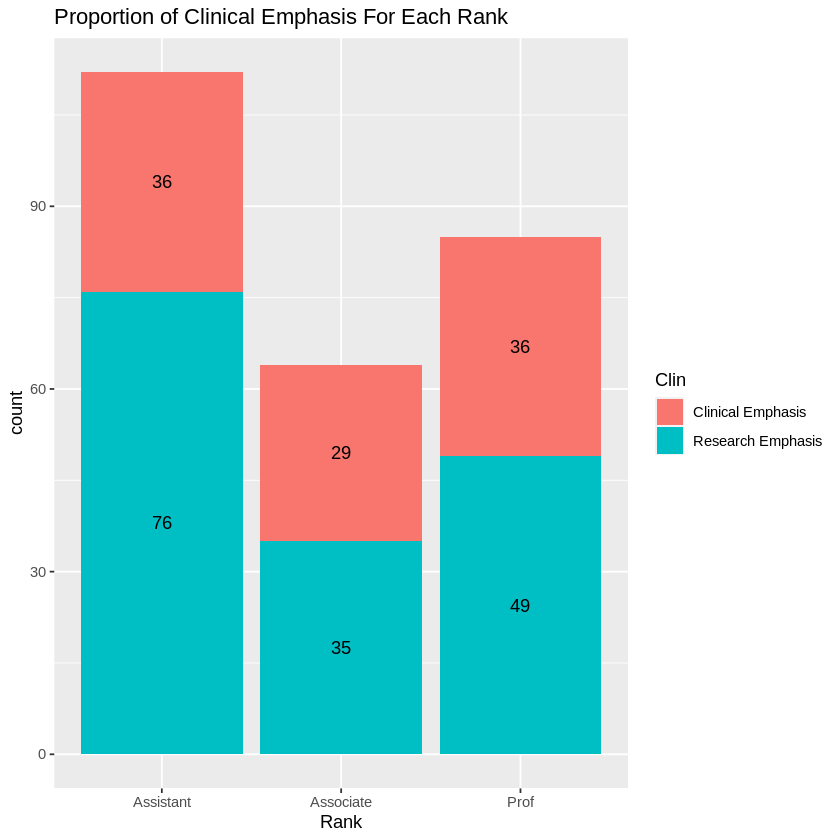

In [ ]:
ggplot(data = lawsuit.dt, aes(Rank, fill = Clin)) +
  geom_bar() +
  scale_fill_discrete(labels = c("0" = "Clinical Emphasis", "1" = "Research Emphasis")) +
  scale_x_discrete(labels = c("1" = "Assistant", "2" = "Associate", "3" = "Prof")) +
  labs(title = "Proportion of Clinical Emphasis For Each Rank") +
  geom_text(stat='count', aes(label=after_stat(count)), position = position_stack(vjust = 0.5))

## Department vs rank

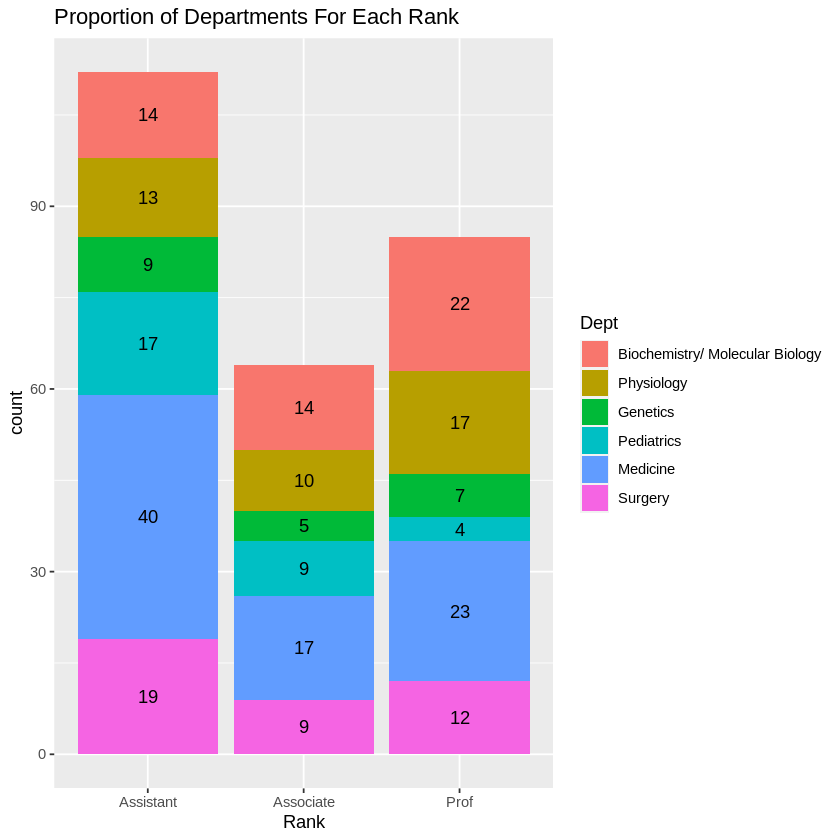

In [ ]:
ggplot(data = lawsuit.dt, aes(Rank, fill = Dept)) +
  geom_bar() +
  scale_fill_discrete(labels = c("1" = "Biochemistry/ Molecular Biology", "2" = "Physiology", "3" = "Genetics", "4" = "Pediatrics", "5" = "Medicine", "6" = "Surgery")) +
  scale_x_discrete(labels = c("1" = "Assistant", "2" = "Associate", "3" = "Prof")) +
  labs(title = "Proportion of Departments For Each Rank") +
  geom_text(stat='count', aes(label=after_stat(count)), position = position_stack(vjust = 0.5))

In [ ]:
# summarize within each rank statistics
rank1.dt <- lawsuit.dt[Rank == '1',]
rank2.dt <- lawsuit.dt[Rank == '2',]
rank3.dt <- lawsuit.dt[Rank == '3',]

In [ ]:
# percentage of Assistant that belong to each Department 
table(rank1.dt$Dept) / nrow(rank1.dt) * 100

# percentage of Associates that belong to each Department 
table(rank2.dt$Dept) / nrow(rank2.dt) * 100

# percentage of Profs that belong to each Department 
table(rank3.dt$Dept) / nrow(rank3.dt) * 100


        1         2         3         4         5         6 
12.500000 11.607143  8.035714 15.178571 35.714286 16.964286 


      1       2       3       4       5       6 
21.8750 15.6250  7.8125 14.0625 26.5625 14.0625 


        1         2         3         4         5         6 
25.882353 20.000000  8.235294  4.705882 27.058824 14.117647 

In [ ]:
depts.dt <- lawsuit.dt[Dept == '1' | Dept == '2' | Dept == '4',]

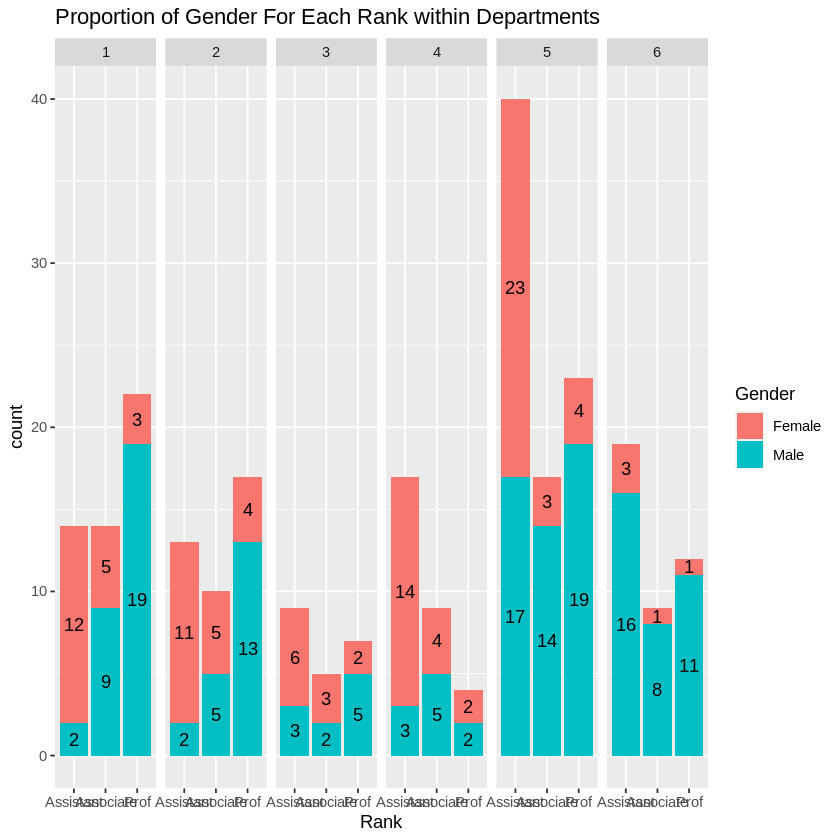

In [ ]:
ggplot(data = lawsuit.dt, aes(Rank, fill = Gender)) +
  geom_bar() +
  facet_grid(. ~Dept) +
  scale_fill_discrete(labels = c("0" = "Female", "1" = "Male")) +
  scale_x_discrete(labels = c("1" = "Assistant", "2" = "Associate", "3" = "Prof")) +
  labs(title = "Proportion of Gender For Each Rank within Departments") +
  geom_text(stat='count', aes(label=after_stat(count)), position = position_stack(vjust = 0.5))

## Dept vs Pay

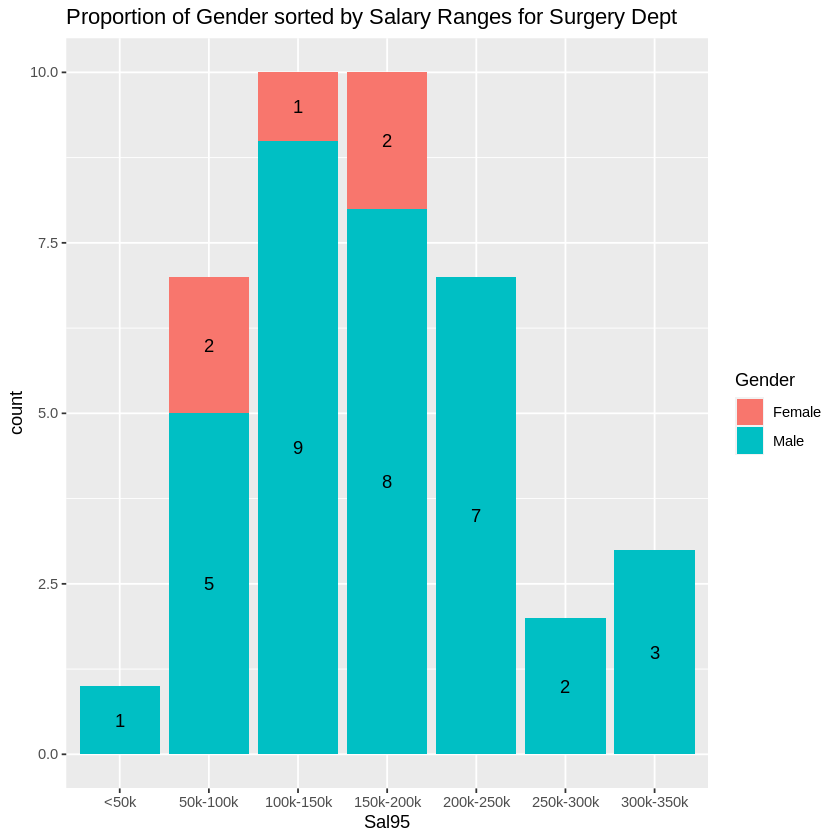

In [ ]:
dept6.dt <- lawsuit.dt[Dept == '6',]
dept6.dt$Sal95 <- cut(dept6.dt$Sal95, breaks = seq(0, 500000, 50000))
# plot proportion of gender sorted by salary ranges
ggplot(dept6.dt, aes(fill=Gender, x=Sal95)) + 
  scale_fill_discrete(labels = c("Female", "Male")) +
  labs(title ="Proportion of Gender sorted by Salary Ranges for Surgery Dept") +
  geom_bar(width=0.9) +
  theme(panel.spacing = unit(2, "lines")) +
  scale_x_discrete(labels=c('<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '>450k')) +
  geom_text(stat='count', aes(label=after_stat(count)), position = position_stack(vjust = 0.5))

In [ ]:
dept6_prof.dt <- dept6.dt[Rank == '3',]
dept6_prof.dt

ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,pay_raise,pay_alpha94,pay_alpha95
<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<dbl>
225,6,1,1,1,2.1,16,3,312892,"(3e+05,3.5e+05]",31909,135553.2,117977.9
226,6,1,1,1,2.5,13,3,317399,"(3e+05,3.5e+05]",27805,140060.2,122484.9
227,6,1,1,1,2.4,21,3,342662,"(3.5e+05,4e+05]",27050,165323.2,147747.9
229,6,1,1,1,3.2,11,3,339533,"(3.5e+05,4e+05]",47672,162194.2,144618.9
230,6,1,1,1,2.4,22,3,393408,"(4e+05,4.5e+05]",42164,216069.2,198493.9
232,6,1,1,1,2.4,27,3,419129,"(4.5e+05,5e+05]",53460,241790.2,224214.9
239,6,1,1,1,2.7,12,3,428876,"(4.5e+05,5e+05]",33466,251537.2,233961.9
241,6,1,1,1,3.2,10,3,366150,"(4e+05,4.5e+05]",42748,188811.2,171235.9
242,6,1,1,1,2.3,8,3,299582,"(3e+05,3.5e+05]",40055,122243.2,104667.9


In [ ]:
summary(dept6_prof.dt)

       ID        Dept   Gender Clin   Cert       Prate           Exper      
 Min.   :225.0   1: 0   0: 1   0: 0   0: 0   Min.   :2.100   Min.   : 8.00  
 1st Qu.:228.5   2: 0   1:11   1:12   1:12   1st Qu.:2.400   1st Qu.:10.00  
 Median :235.5   3: 0                        Median :2.550   Median :12.50  
 Mean   :238.2   4: 0                        Mean   :2.642   Mean   :15.33  
 3rd Qu.:244.8   5: 0                        3rd Qu.:2.825   3rd Qu.:21.25  
 Max.   :258.0   6:12                        Max.   :3.200   Max.   :27.00  
                                                                            
 Rank       Sal94                    Sal95     pay_raise      pay_alpha94    
 1: 0   Min.   :299582   (3e+05,3.5e+05]:4   Min.   :27050   Min.   :122243  
 2: 0   1st Qu.:316272   (3.5e+05,4e+05]:3   1st Qu.:31828   1st Qu.:144034  
 3:12   Median :341098   (4.5e+05,5e+05]:3   Median :37159   Median :177067  
        Mean   :355136   (4e+05,4.5e+05]:2   Mean   :38035   Mean   :182

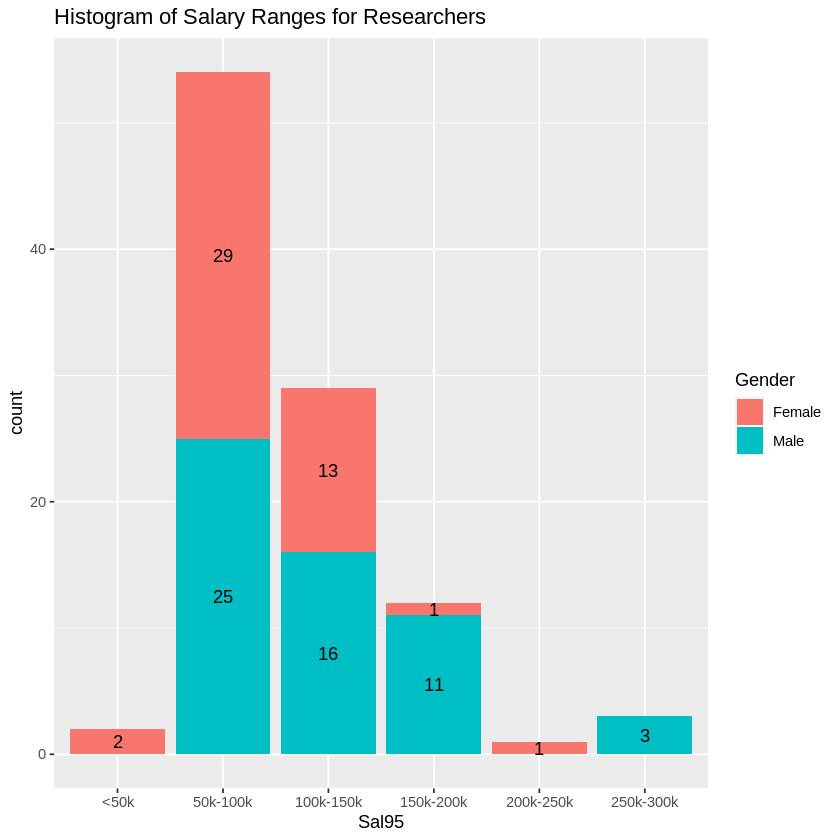

In [ ]:
researchers.dt$Sal95 <- cut(researchers.dt$Sal95, breaks = seq(0, 500000, 50000))

ggplot(researchers.dt, aes(fill=Gender, x=Sal95)) + 
  scale_fill_discrete(labels = c("Female", "Male")) +
  labs(title ="Histogram of Salary Ranges for Researchers") +
  geom_bar(width=0.9) +
  theme(panel.spacing = unit(2, "lines")) +
  scale_x_discrete(labels=c('<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '>450k')) +
  geom_text(stat='count', aes(label=after_stat(count)), position = position_stack(vjust = 0.5))

In [ ]:
summary(researchers.dt)

       ID         Dept   Gender Clin    Cert       Prate           Exper      
 Min.   :  1.00   1:44   0:46   0:101   0:47   Min.   :4.400   Min.   : 2.00  
 1st Qu.: 29.00   2:25   1:55   1:  0   1:54   1st Qu.:6.600   1st Qu.: 7.00  
 Median : 61.00   3: 9                         Median :7.300   Median :10.00  
 Mean   : 75.94   4: 8                         Mean   :6.991   Mean   :10.73  
 3rd Qu.:109.00   5:14                         3rd Qu.:7.700   3rd Qu.:14.00  
 Max.   :236.00   6: 1                         Max.   :8.700   Max.   :37.00  
                                                                              
 Rank       Sal94                    Sal95      pay_raise    
 1:36   Min.   : 34514   (5e+04,1e+05]  :54   Min.   : 2312  
 2:29   1st Qu.: 68825   (1e+05,1.5e+05]:29   1st Qu.: 6339  
 3:36   Median : 89781   (1.5e+05,2e+05]:12   Median : 8425  
        Mean   : 98759   (2.5e+05,3e+05]: 3   Mean   : 9355  
        3rd Qu.:113149   (0,5e+04]      : 2   3rd Qu.:1119

In [ ]:
researchers.dt[Rank == '3' & Gender == '0', ]

ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,pay_raise
<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<int>,<fct>,<int>
37,1,0,0,0,7.9,16,3,106412,"(1e+05,1.5e+05]",10547
40,1,0,0,0,8.0,12,3,90771,"(1e+05,1.5e+05]",12156
73,2,0,0,1,7.9,14,3,119851,"(1e+05,1.5e+05]",11199
216,5,0,0,1,5.8,23,3,204279,"(2e+05,2.5e+05]",23511


In [ ]:
researchers.dt[Rank == '3' & Dept == '5', ]

ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,pay_raise
<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<int>,<fct>,<int>
146,5,1,0,1,5.6,11,3,147213,"(1.5e+05,2e+05]",8613
149,5,1,0,1,5.2,12,3,167199,"(1.5e+05,2e+05]",15202
158,5,1,0,0,5.7,15,3,172793,"(1.5e+05,2e+05]",11598
176,5,1,0,0,5.1,8,3,129499,"(1e+05,1.5e+05]",12162
182,5,1,0,1,4.7,21,3,275377,"(2.5e+05,3e+05]",18959
216,5,0,0,1,5.8,23,3,204279,"(2e+05,2.5e+05]",23511


In [ ]:
researchers.dt[Rank == '3' & Prate >= 6.7, ]

ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,pay_raise
<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<int>,<fct>,<int>
1,1,1,0,0,7.4,9,3,77836,"(5e+04,1e+05]",6776
5,1,1,0,0,7.0,10,3,89268,"(5e+04,1e+05]",6831
6,1,1,0,1,7.7,10,3,79714,"(5e+04,1e+05]",7817
9,1,1,0,0,7.7,18,3,81271,"(5e+04,1e+05]",4166
16,1,1,0,0,8.1,9,3,81197,"(5e+04,1e+05]",10603
17,1,1,0,0,7.3,16,3,90178,"(1e+05,1.5e+05]",11650
18,1,1,0,1,7.7,9,3,105564,"(1e+05,1.5e+05]",12179
20,1,1,0,1,7.2,14,3,113149,"(1e+05,1.5e+05]",11283
21,1,1,0,1,8.6,27,3,157510,"(1.5e+05,2e+05]",11163
